# 1. Dataset Reading using Pandas

- Training data

In [1]:
import pandas as pd

df_train = pd.read_csv('../data/train.csv', encoding='ISO-8859-1')

df_train.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  
0  Afghanistan          38928346         652860.0               60  
1      Albania           2877797          27400.0              105  
2      Algeria          43851044        2381740.0               18  
3      Andorra             77265            470.0              164  
4       Angola          32866272        1246700.0               26

- Validation data

In [2]:
df_val = pd.read_csv('../data/test.csv', encoding='ISO-8859-1')

df_val.head()

textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            105.0  
2             18.0  
3            164.0  
4             26.0

# 2. Data preprocessing

- Training Data Distributions

<Axes: xlabel='sentiment', ylabel='text'>

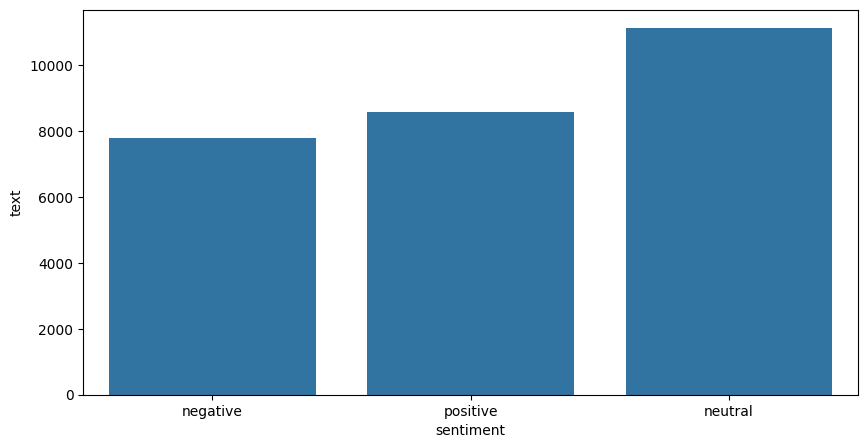

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

df_train.replace("", np.nan, inplace=True)
df_train.dropna(inplace=True)
df_train.reset_index(drop=True, inplace=True)
data = df_train.groupby('sentiment')['text'].count().sort_values().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data=data,x='sentiment',y='text')

- Validation Data Distributions

In [4]:
df_val.replace("", np.nan, inplace=True)
df_val.dropna(inplace=True)
df_val.reset_index(drop=True, inplace=True)
data = df_val.groupby('sentiment')['text'].count().sort_values().reset_index()
plt.figure(figsize = (10,5))
sns.barplot(data=data,x='sentiment',y='text')

<Axes: xlabel='sentiment', ylabel='text'>

- Dropping unnecessary columns in both df_val and df_train

In [5]:
df_train.drop(['textID', 
               'Time of Tweet', 
               'Age of User', 
               'Country', 
               'Population -2020', 
               'Land Area (Km²)', 
               'Density (P/Km²)'], axis=1, inplace=True)
df_train.head()

text  \
0                I`d have responded, if I were going   
1      Sooo SAD I will miss you here in San Diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [6]:
df_val.drop([   'textID', 
                'Time of Tweet', 
                'Age of User', 
                'Country', 
                'Population -2020', 
                'Land Area (Km²)', 
                'Density (P/Km²)'], axis=1, inplace=True)
df_val.head()

text sentiment
0  Last session of the day  http://twitpic.com/67ezh   neutral
1   Shanghai is also really exciting (precisely -...  positive
2  Recession hit Veronique Branquinho, she has to...  negative
3                                        happy bday!  positive
4             http://twitpic.com/4w75p - I like it!!  positive

- Regex to remove unneeded symbol, punctuation, etc.

In [7]:
import re
from string import punctuation

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\[\]]*', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df_train['text'] = df_train['text'].apply(preprocess_text)
df_val['text'] = df_val['text'].apply(preprocess_text)

- Using stopwords to remove unneeded words

In [8]:
import nltk
# nltk.download('stopwords') # run this on a new devices
from nltk.corpus import stopwords

eng_stopwords = stopwords.words('english')

def remove_stopwords(text: str) -> str:
    return ' '.join([word for word in text.split() if word not in eng_stopwords])

df_train['text'] = df_train['text'].apply(remove_stopwords)
df_val['text'] = df_val['text'].apply(remove_stopwords)

- Dropping row for:
  - Empty statements
  - Whitespace statements
  - Duplicate statements

In [9]:
# Dropping empty statement
df_train = df_train.dropna(subset=['text'])
df_val = df_val.dropna(subset=['text'])

# Dropping whitespace statement
df_train = df_train[df_train['text'] != '']
df_val = df_val[df_val['text'] != '']

# Dropping duplicate statement
df_train = df_train.drop_duplicates(subset=['text'])
df_val = df_val.drop_duplicates(subset=['text'])

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)

- Shape checking

In [10]:
(df_train.shape, df_val.shape)

((26830, 3), (3501, 2))

- Data Splitting (statements & labels)

In [11]:
train_statements = df_train['text'].values
train_labels = df_train['sentiment'].values

val_statements = df_val['text'].values
val_labels = df_val['sentiment'].values

# 3. Encode the data (statements & labels)

- statements encoding

  1. Create a tokenizer: `tf.keras.preprocessing.text.Tokenizer(...)`

    - Takes only 10000 words that will be kept onto the vocabulary.
    - oov_token: "out of vocabulary" -> use to represent any word that is not part of tokenizer's vocabulary.
  2. Apply the sentences: `tokenizer.fit_on_texts(...)`
    - `fit_on_texts()`: **Counts word frequencies** in the given text and **creates an index** where each word is *assigned* an integer.
  3. Convert each sentence into a sequence of integers: `texts_to_sequences(...)`
      - Words that **are not in the top 10000** most frequent words are replaced by the index for the `<OOV>` token.

In [12]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token='<OOV>')

tokenizer.fit_on_texts(train_statements)
tokenizer.fit_on_texts(val_statements)

train_sequences = tokenizer.texts_to_sequences(train_statements)
val_sequences = tokenizer.texts_to_sequences(val_statements)

- Getting max length of a token for padded sequences making

In [13]:
max_sequence_length = max(len(token) for token in train_sequences)
max_val_length = max(len(token) for token in val_sequences)

max_sequence_length, max_val_length

(23, 21)

- Changing `train_sequences` and `val_sequences` into padded sequences

  Why do we need to pads the sequences?

  - Pads the sequences of integers is to ensure they all have the same length: `tf.keras.preprocessing.sequence.pad_sequences(...)`
  - `maxlen=161`: Specifies that each sequence will have a maximum length of 161. **If a sequence is shorter than 161 words, it will be padded with zeros to make its length 161.**
  - `padding='post'`: Specifies that the padding (zeros) **will be added to the end** of each sequence (after the text).

In [14]:
train_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
val_pad_sequences = tf.keras.preprocessing.sequence.pad_sequences(val_sequences, maxlen=max_val_length, padding='post', truncating='post')

train_pad_sequences.shape, val_pad_sequences.shape

((26830, 23), (3501, 21))

- One Hot Encoding

one_hot_encoding.png

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train_label_arrays = encoder.fit_transform(train_labels)
test_label_arrays = encoder.fit_transform(val_labels)

# One-Hot Encoding
train_label_arrays = tf.keras.utils.to_categorical(train_label_arrays)
test_label_arrays = tf.keras.utils.to_categorical(test_label_arrays)

train_label_arrays

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

- Variable names changing 
    - for better readibility (since we don't use train_test_split() for this dataset)

In [16]:
X_train = train_pad_sequences
y_train = train_label_arrays

X_test = val_pad_sequences
y_test = test_label_arrays

- Combine train dataset with test dataset

In [17]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
dataset = dataset.shuffle(5000).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.shuffle(5000).batch(32)

- Data Splitting

In [18]:
X_train

array([[186,   1,  11, ...,   0,   0,   0],
       [310,  50,  35, ...,   0,   0,   0],
       [  1,   1,   0, ...,   0,   0,   0],
       ...,
       [132,   4, 241, ...,   0,   0,   0],
       [575,   0,   0, ...,   0,   0,   0],
       [  1,  11,   1, ...,   0,   0,   0]])

# 4. Deep Learning Model (RNN)

RNN:
- Embedding layer (Acts as **input layer**) --> Changing word into a vector representation of word based on its context in that sentences.
- LSTM Layer (Long-Short-Term-Memory) --> For memorizing text contexts
- Dense Layer (ReLu Activation function)
- Output Layer (Softmax Activation function)

image.png

  - Softmax function

  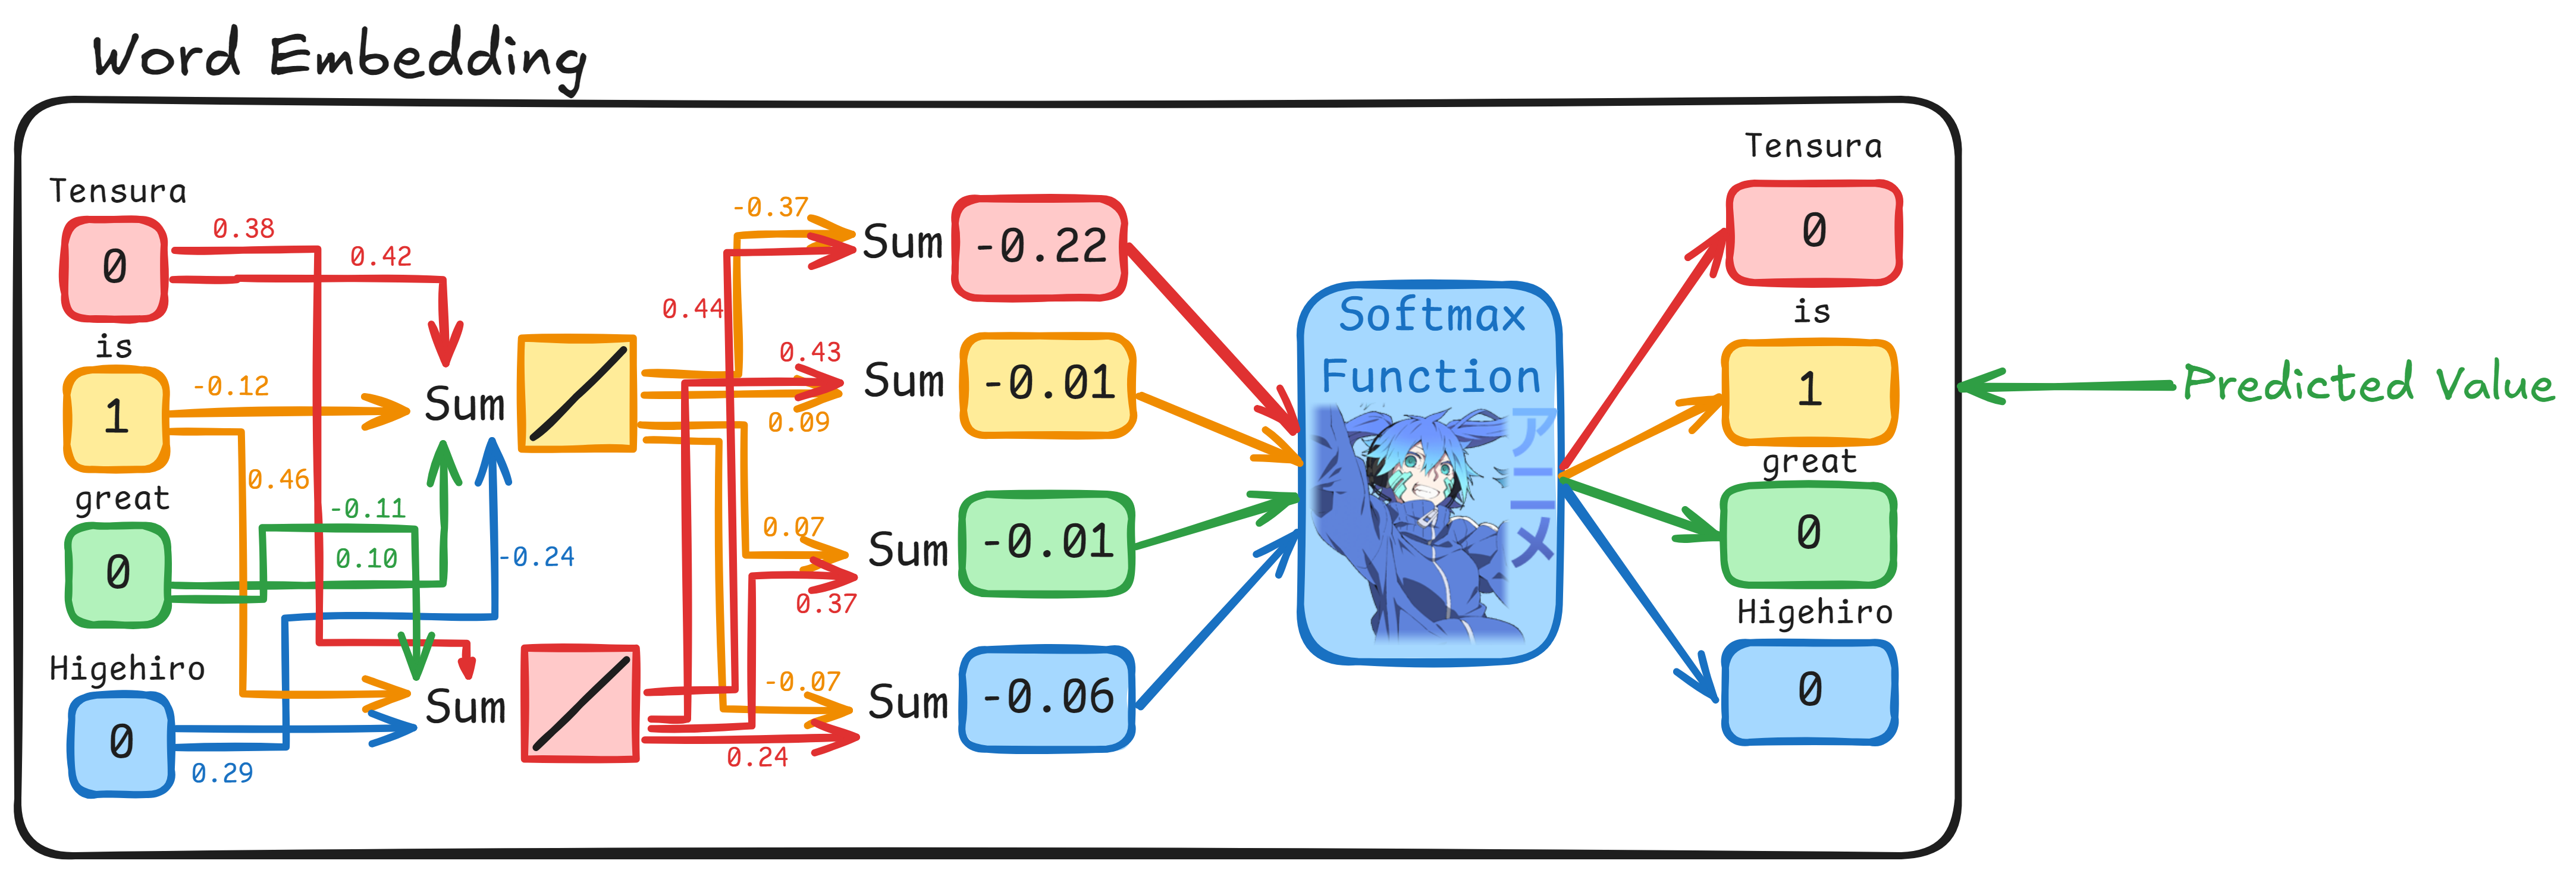

- Getting input_size for embedding layer input dimensions

In [19]:
input_size = np.max([np.max(train_pad_sequences), np.max(val_pad_sequences)]) + 1
input_size

1000

### Hyperparameter

In [20]:
# hyperparameters

embedding_dim = 256
batch_size = 64
epochs = 20

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

- Creating the Neural Network Model

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=input_size, output_dim=embedding_dim),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

- Compile the model using:

    - Adam for learning-rate optimizer
    - Categorical Crossentropy for loss calculations

In [22]:
model.compile(  optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'],
                run_eagerly=True)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

- Combatting overfitting

    - Early Stopping

    early_stopping.png

    - Learning Rate Scheduler

In [23]:
early_stopping = tf.keras.callbacks.EarlyStopping(  monitor='val_loss',
                                                    patience=3,
                                                    restore_best_weights=True)

lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(    monitor='val_loss',
                                                        factor=0.5,
                                                        patience=2,
                                                        min_lr=1e-6)

- Model Training

In [24]:
history = model.fit(dataset,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(val_dataset),
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 675s 803ms/step - accuracy: 0.4277 - loss: 1.8441 - val_accuracy: 0.6601 - val_loss: 1.3430 - learning_rate: 1.0000e-04
Epoch 2/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 658s 784ms/step - accuracy: 0.6414 - loss: 1.3153 - val_accuracy: 0.6544 - val_loss: 1.1435 - learning_rate: 1.0000e-04
Epoch 3/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 653s 778ms/step - accuracy: 0.6736 - loss: 1.0985 - val_accuracy: 0.6932 - val_loss: 0.9668 - learning_rate: 1.0000e-04
Epoch 4/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 743s 886ms/step - accuracy: 0.6848 - loss: 0.9731 - val_accuracy: 0.6738 - val_loss: 0.9476 - learning_rate: 1.0000e-04
Epoch 5/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 681s 812ms/step - accuracy: 0.6945 - loss: 0.8930 - val_accuracy: 0.6872 - val_loss: 0.8389 - learning_rate: 1.0000e-04
Epoch 6/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 667s 795ms/step - accuracy: 0.6925 - loss: 0.8440 - val_accuracy: 0.6947 - val_loss: 0.7958 - learning_rate: 1.0000e-04
Epoch 7/20
839/839 ━━━━━━━━━━━━━━━━━━━━ 

- Model Evaluation

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy with Neural Network: {accuracy}")

110/110 ━━━━━━━━━━━━━━━━━━━━ 34s 306ms/step - accuracy: 0.7039 - loss: 0.7316
Test Accuracy with Neural Network: 0.7037988901138306


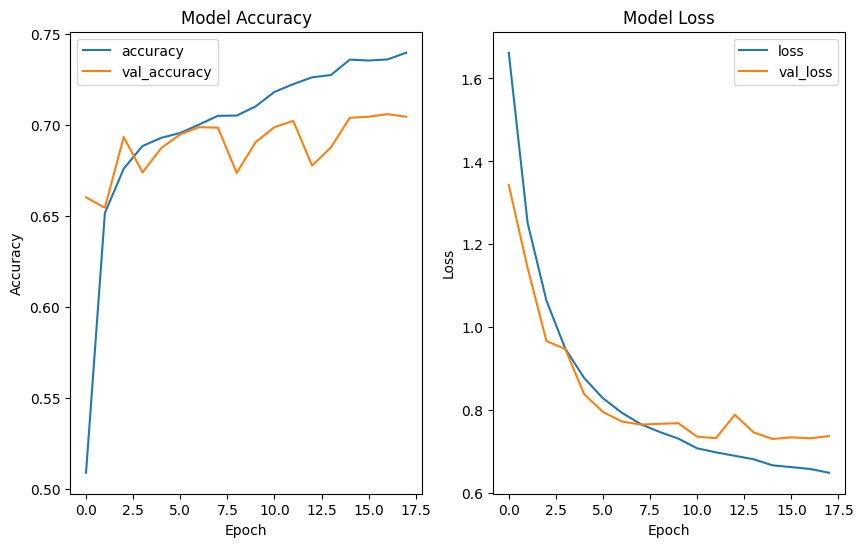

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

- Confusion Matrix

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def model_eval(model):
    y_pred_prob = model.predict(X_test)
    y_pred = y_pred_prob.argmax(axis=1)
    y_test_labels = y_test.argmax(axis=1)
    print(f'Accuracy Score is : {accuracy_score(y_test_labels, y_pred)}')
    print('Classification Report')
    print(classification_report(y_test_labels, y_pred))
    print('Confusion Matrix')
    cm = confusion_matrix(y_test_labels, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

model_eval(model)

110/110 ━━━━━━━━━━━━━━━━━━━━ 31s 282ms/step
Accuracy Score is : 0.7037989145958298
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.58      0.66       996
           1       0.63      0.77      0.70      1414
           2       0.78      0.73      0.75      1091

    accuracy                           0.70      3501
   macro avg       0.72      0.69      0.70      3501
weighted avg       0.72      0.70      0.70      3501

Confusion Matrix


- Model Testing

In [34]:
def predict_class(text: str):
    text = preprocess_text(text)
    text = remove_stopwords(text)
    text = tokenizer.texts_to_sequences([text])
    text = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen=max_sequence_length, padding='post', truncating='post')
    prediction = model.predict(text)
    prediction = prediction.argmax(axis=1)
    return encoder.inverse_transform(prediction)[0]

In [35]:
test_texts = [
    "I absolutely love this product! It's fantastic.", # positive
    "Do not know about what happened there", # neutral
    "I hate this product. It's terrible.", # negative
    "Hate my boss, he is a terrible person", # negative
    "My boss is a great person", # positive
    "I have to bark like a dog to get a raise", # negative
    "I'm so depressed", # negative
    "I'm so happy" # positive
]

for text in test_texts:
    print(f"{text} -> {predict_class(text)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
I absolutely love this product! It's fantastic. -> positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Do not know about what happened there -> neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
I hate this product. It's terrible. -> negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
Hate my boss, he is a terrible person -> negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
My boss is a great person -> positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
I have to bark like a dog to get a raise -> neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
I'm so depressed -> neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
I'm so happy -> positive


- Model save

In [36]:
model.save('../model/model.h5')
model.save('../model/keras/model.keras')

# Load the model
model = tf.keras.models.load_model('../model/model.h5')

- Model deployment

In [42]:
from flask import Flask, request, jsonify

app = Flask(__name__)

MODEL_PATH = '../model/keras/model.keras'
loaded_model = tf.keras.models.load_model(MODEL_PATH)

@app.route('/', methods=['GET'])
def home():
    return "Welcome to the Sentiment Analysis API. Use the /predict endpoint for predictions."

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        if 'input' not in data:
            return jsonify({'error': 'Invalid Input Data'}), 400
        text = np.array(data['input'])

        text = preprocess_text(text)
        text = remove_stopwords(text)
        text = tokenizer.texts_to_sequences([text])
        text = tf.keras.preprocessing.sequence.pad_sequences(text, maxlen=max_sequence_length, padding='post', truncating='post')
        prediction = loaded_model.predict(text)
        prediction = prediction.argmax(axis=1)
        prediction = encoder.inverse_transform(prediction)[0]
        return jsonify({'prediction': prediction}), 200
    except Exception as e:
        return jsonify({'error': str(e)}), 500
    
if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.18.18:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [27/Nov/2024 22:50:00] "GET / HTTP/1.1" 200 -
